In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate synthetic data
data = pd.DataFrame({
    'CustomerID': np.arange(1, num_samples + 1),
    'Age': np.random.randint(18, 70, size=num_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=num_samples),
    'AnnualIncome': np.random.normal(50, 15, num_samples).astype(int),  # In thousands of dollars
    'PurchaseFrequency': np.random.poisson(5, num_samples),  # Number of purchases in the last year
    'AveragePurchaseValue': np.round(np.random.normal(200, 50, num_samples), 2),  # Average in dollars
    'LastPurchaseDays': np.random.randint(1, 365, size=num_samples),  # Days since last purchase
    'BrowsingTime': np.round(np.random.normal(15, 5, num_samples), 2),  # Avg browsing time in minutes
    'LoyaltyProgram': np.random.choice(['Yes', 'No'], size=num_samples),
})

# Generate target variable with some conditions to simulate likelihood of purchase
data['Purchase'] = np.where(
    (data['PurchaseFrequency'] > 4) &
    (data['LastPurchaseDays'] < 90) &
    (data['LoyaltyProgram'] == 'Yes') &
    (data['AveragePurchaseValue'] > 150), 1, 0
)

# Save dataset to CSV
file_path = '/mnt/data/synthetic_customer_data.csv'
data.to_csv(file_path, index=False)

file_path


'/mnt/data/synthetic_customer_data.csv'

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
# Load your data
data = pd.read_csv("/mnt/data/synthetic_customer_data.csv")

In [22]:
data.head(10)

,CustomerID,Age,AnnualIncome,PurchaseFrequency,AveragePurchaseValue,LastPurchaseDays,BrowsingTime,Purchase,Gender_Male,LoyaltyProgram_Yes
0,1,56,49,5,225.16,149,14.22,0,True,False
1,2,69,67,5,198.27,350,12.52,0,True,True
2,3,46,87,4,236.44,91,17.14,0,True,False
3,4,32,42,2,229.63,236,21.02,0,False,False
4,5,60,42,6,198.24,289,18.62,0,True,False
5,6,25,65,8,174.46,356,19.61,0,True,False
6,7,38,60,7,252.13,168,12.07,0,True,True
7,8,56,77,2,223.16,193,14.98,0,False,False
8,9,36,58,6,130.93,187,12.13,0,False,False
9,10,40,44,9,211.04,271,15.54,0,True,True


In [ ]:
#2. Exploratory Data Analysis (EDA)

In [7]:
# Overview of data
print(data.info())
print(data.describe())

# Checking for missing values
print(data.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   AnnualIncome          1000 non-null   int64  
 4   PurchaseFrequency     1000 non-null   int64  
 5   AveragePurchaseValue  1000 non-null   float64
 6   LastPurchaseDays      1000 non-null   int64  
 7   BrowsingTime          1000 non-null   float64
 8   LoyaltyProgram        1000 non-null   object 
 9   Purchase              1000 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 78.2+ KB
None
        CustomerID         Age  AnnualIncome  PurchaseFrequency  \
count  1000.000000  1000.00000   1000.000000        1000.000000   
mean    500.500000    43.81900     50.688000           4.941000   
std     288.8

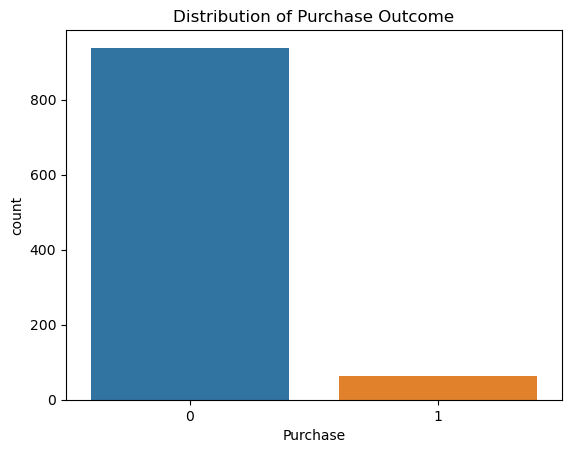

In [10]:
sns.countplot(x='Purchase', data=data)
plt.title("Distribution of Purchase Outcome")
plt.show()


In [11]:

print(data.columns)


Index(['CustomerID', 'Age', 'Gender', 'AnnualIncome', 'PurchaseFrequency',
       'AveragePurchaseValue', 'LastPurchaseDays', 'BrowsingTime',
       'LoyaltyProgram', 'Purchase'],
      dtype='object')


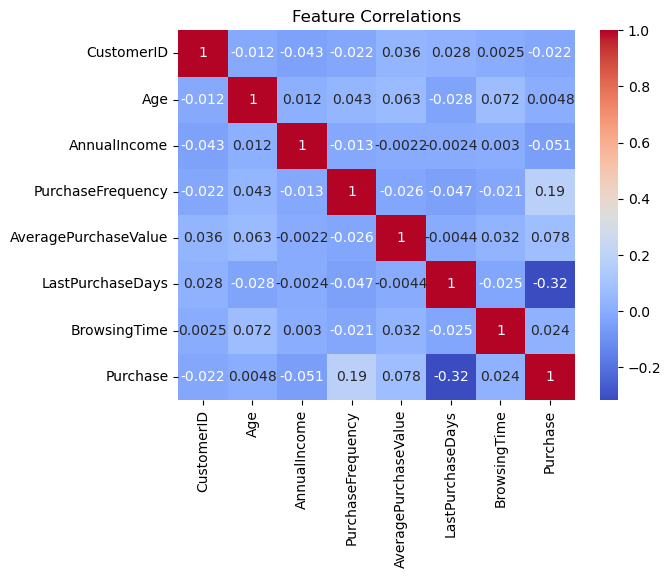

In [13]:
# Compute correlation matrix only for numeric columns
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()


In [14]:
#Step 3: Data Preprocessing

In [15]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Gender', 'LoyaltyProgram'], drop_first=True)

# Separate features and target variable
X = data.drop('Purchase', axis=1)
y = data['Purchase']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
#Step 4: Train-Test Split

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#Step 5: Model Selection and Training

In [17]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Step 6: Model Evaluation

Accuracy: 0.9966666666666667


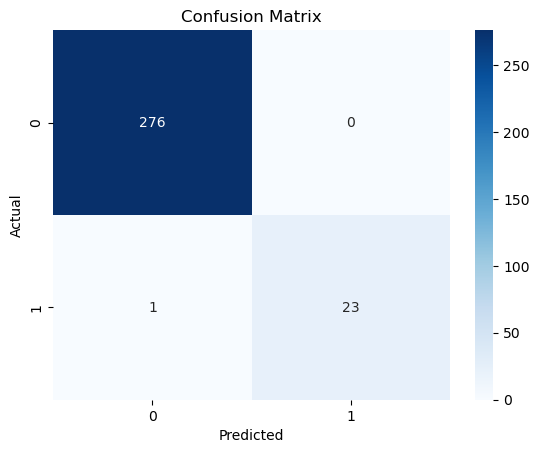

ROC-AUC Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      0.96      0.98        24

    accuracy                           1.00       300
   macro avg       1.00      0.98      0.99       300
weighted avg       1.00      1.00      1.00       300



In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC score
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# Classification report
print(classification_report(y_test, y_pred))


In [ ]:
#Step 7: Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best ROC-AUC Score: 0.9988360809627778


In [ ]:
#Step 8: Feature Importance

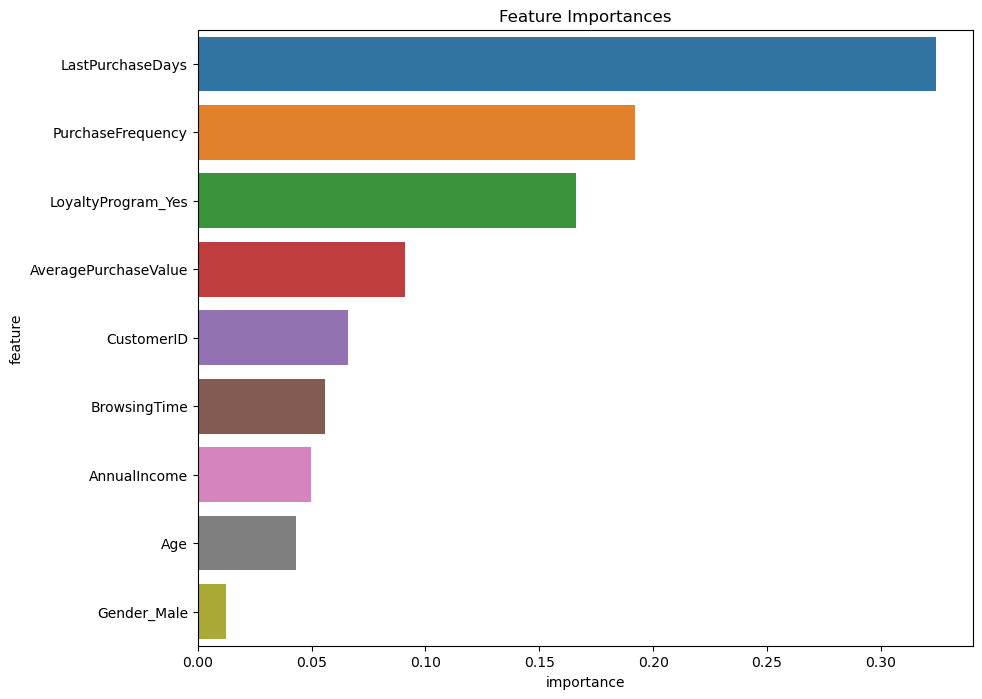

In [20]:
# Plot feature importances
feature_importances = model.feature_importances_
features = data.drop('Purchase', axis=1).columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Feature Importances")
plt.show()


In [ ]:
#Step 9: Save the Model

In [21]:
import joblib

# Save the model
joblib.dump(model, 'customer_propensity_model.pkl')


['customer_propensity_model.pkl']